In [144]:
import pandas as pd
import seaborn as sns

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
df = pd.read_csv('/content/drive/MyDrive/project/test_full_bez_musor.csv', sep=';')

In [147]:
df.head()

,time,name_pred,srok_lota,name_pers,vikup,price_stav,price_vik
0,17.05.2022 8:32,ох,,в -,во,,0
1,17.05.2022 8:47,у №,Г,Ее <,Ман,,0
2,17.05.2022 8:49,,,,я <,,0
3,18.05.2022 5:38,,,в.,2,,0
4,18.05.2022 5:56,,,у к» 05,,,0


In [148]:
df.dtypes

time          object
name_pred     object
srok_lota     object
name_pers     object
vikup         object
price_stav    object
price_vik      int64
dtype: object

In [149]:
z=pd.to_datetime(df.time).sort_values()

In [150]:
z

270138   2022-02-05 00:00:00
271299   2022-02-05 00:00:00
270156   2022-02-05 00:00:00
270157   2022-02-05 00:00:00
270158   2022-02-05 00:00:00
                 ...        
4321     2022-05-31 05:03:00
4322     2022-05-31 05:03:00
14349    2022-05-31 05:03:00
1673     2022-05-31 05:03:00
7250     2022-05-31 05:03:00
Name: time, Length: 579236, dtype: datetime64[ns]

In [151]:
df['day']=z

In [152]:
df

,time,name_pred,srok_lota,name_pers,vikup,price_stav,price_vik,day
0,17.05.2022 8:32,ох,,в -,во,,0,2022-05-17 08:32:00
1,17.05.2022 8:47,у №,Г,Ее <,Ман,,0,2022-05-17 08:47:00
2,17.05.2022 8:49,,,,я <,,0,2022-05-17 08:49:00
3,18.05.2022 5:38,,,в.,2,,0,2022-05-18 05:38:00
4,18.05.2022 5:56,,,у к» 05,,,0,2022-05-18 05:56:00
...,...,...,...,...,...,...,...,...
579231,02.05.2022 0:47,Капюшон ночного штурма.,средний,Сопенбург Е,Выку,3164,3993332,2022-02-05 00:47:00
579232,02.05.2022 1:03,Капюшон ночного штурма.,средний,Сопенбург Е,Выку,3164,3993332,2022-02-05 01:03:00
579233,25.05.2022 4:59,Хладное око Ребрада,лытельный,,Выку,27000,7427100,2022-05-25 04:59:00
579234,27.04.2022 8:59,Хладное око Ребрада,лытельный,,Выку,27000,7427100,2022-04-27 08:59:00


In [153]:
df.name_pred.unique()

array(['ох ', 'у № ', ' ', ...,
       'пе. И бис Г: | Благословенные кенарийские сапоги ',
       'Закаленный шлем из титановой стали ',
       'Брюки лазугчика со знаком совы '], dtype=object)

In [154]:
a=df[df['name_pred'].str.contains(r'\bЖемчужное плетеное')]

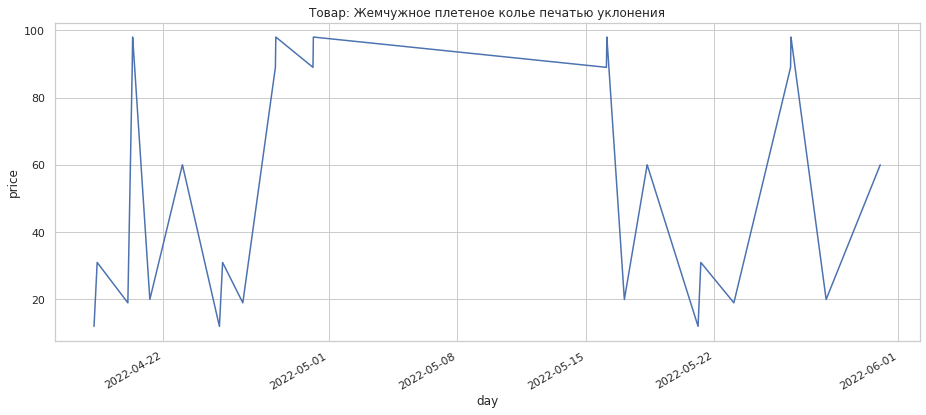

In [155]:
import matplotlib.pyplot as plt
a.plot(x="day", y="price_vik", figsize = (15.5, 6.5), ylabel='price', title='Товар: Жемчужное плетеное колье печатью уклонения', legend=None)
plt.show()

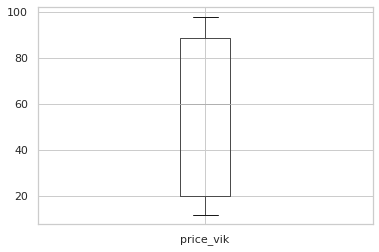

In [156]:
a.boxplot(column='price_vik')

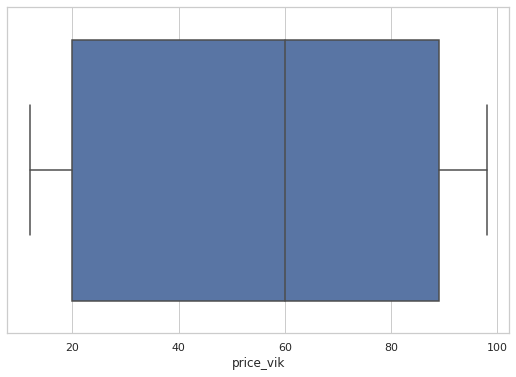

In [172]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(9,6))
ax = sns.boxplot(x=a["price_vik"])




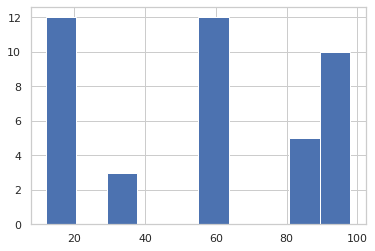

In [158]:
a.price_vik.hist()

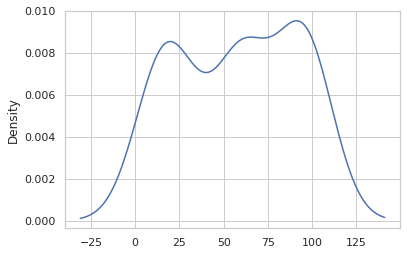

In [159]:
a['price_vik'].plot.kde()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


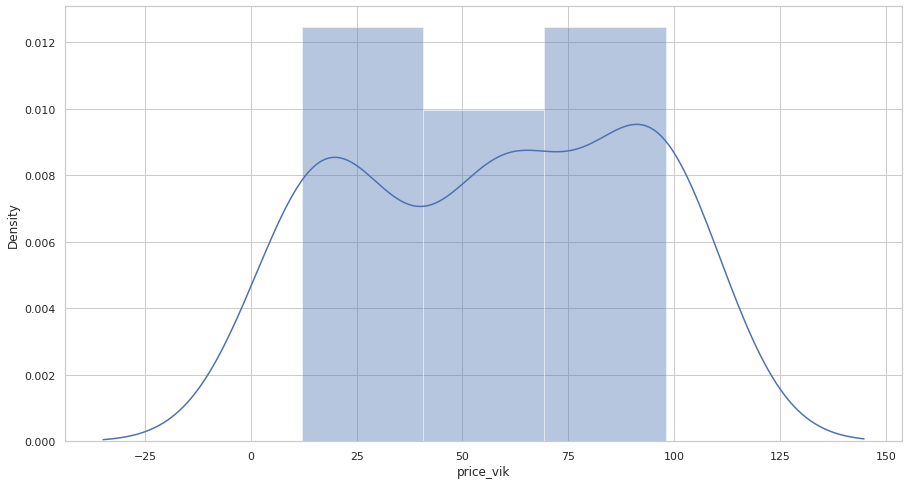

In [160]:

plt.figure(figsize=(15,8))
sns.distplot(a['price_vik'])

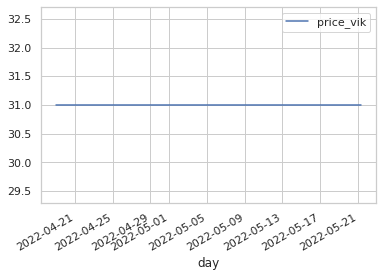

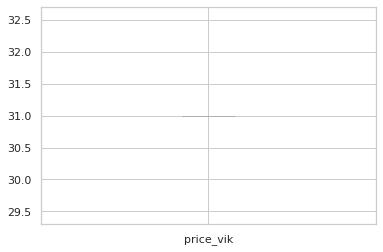

In [161]:
b=df[df['name_pred'].str.contains(r'\bТопор лесоруба')]
b.plot(x="day", y="price_vik")
plt.show()
b.boxplot(column='price_vik')

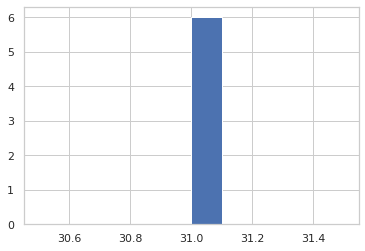

In [162]:
b.price_vik.hist()

In [163]:
q=df['name_pred'].value_counts().head(5)

In [164]:
q

Карта Новолуния: Берсерк!           11213
Зелье дикой магии                   10827
Рунический флакон с зельем маны      8504
Настой бесконечной ярости            7619
Огненный зев                         6351
Name: name_pred, dtype: int64

In [165]:
q.to_frame()

,name_pred
Карта Новолуния: Берсерк!,11213
Зелье дикой магии,10827
Рунический флакон с зельем маны,8504
Настой бесконечной ярости,7619
Огненный зев,6351


In [166]:
x = {'Name': ['Карта Новолуния: Берсерк!', 'Зелье дикой магии', 'Рунический флакон с зельем маны', 'Настой бесконечной ярости', 'Огненный зев'], 'Count': [11213, 10827, 8504, 7619, 6351]}  
x = pd.DataFrame(x) 

In [167]:
x

,Name,Count
0,Карта Новолуния: Берсерк!,11213
1,Зелье дикой магии,10827
2,Рунический флакон с зельем маны,8504
3,Настой бесконечной ярости,7619
4,Огненный зев,6351


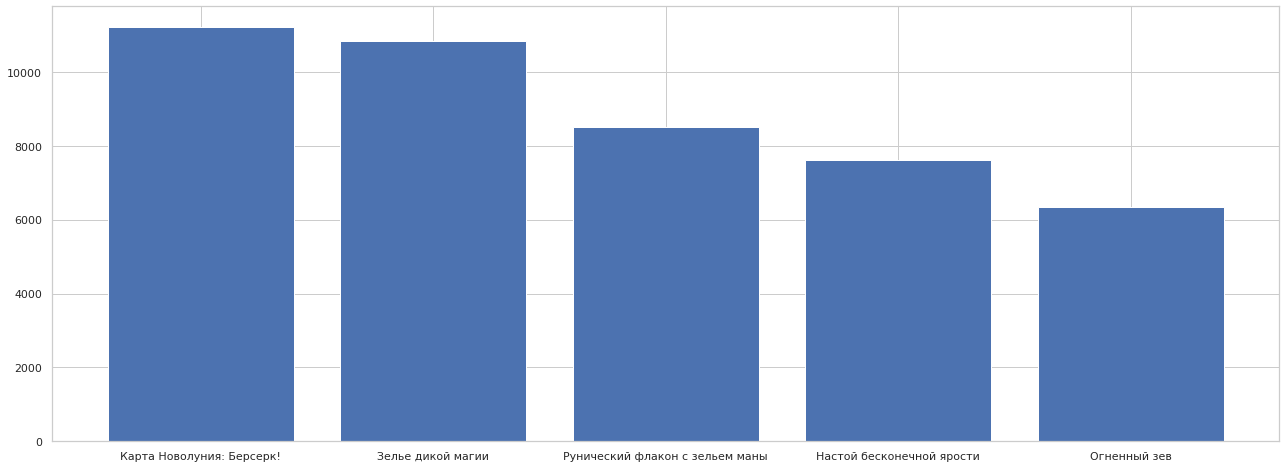

In [178]:
plt.figure(figsize=(22,8))
plt.bar(x.Name, x.Count)
plt.show()

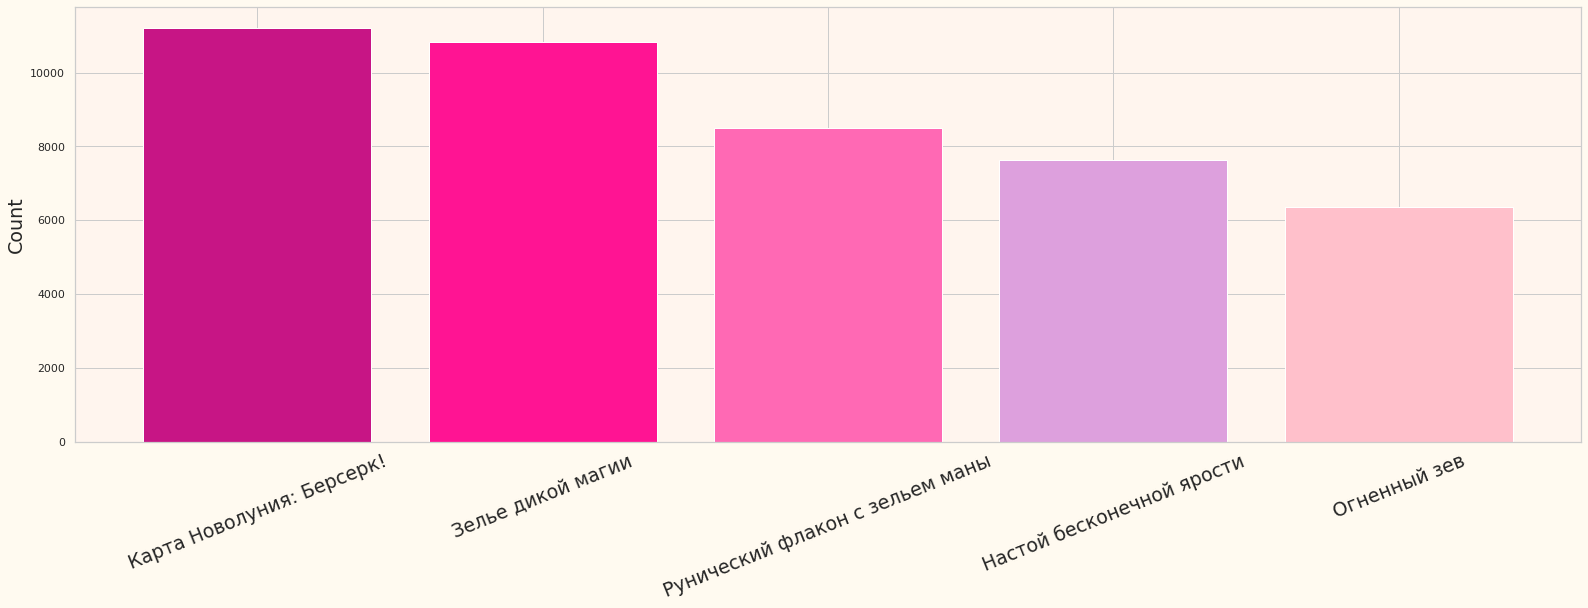

In [336]:
import numpy as np
fig, ax = plt.subplots()

color_rectangle = ['mediumvioletred','deeppink','hotpink','plum','pink']   # RGB
ax.bar(x.Name, x.Count, color = color_rectangle)
plt.ylabel("Count", fontsize=19)
plt.xticks(fontsize=19, rotation=22)
fig.set_figwidth(27)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

In [358]:
df1=df[df['name_pred'].str.contains(r'\bПлащ из меха мамонта')]
df2=df[df['name_pred'].str.contains(r'\bКожаный плащ')]

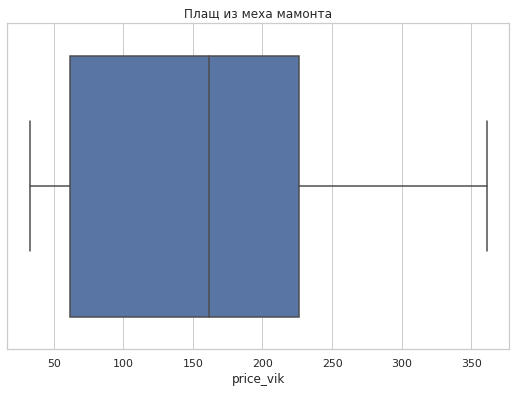

In [374]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(9,6))
ax = sns.boxplot(x=df1["price_vik"]).set_title('Плащ из меха мамонта')


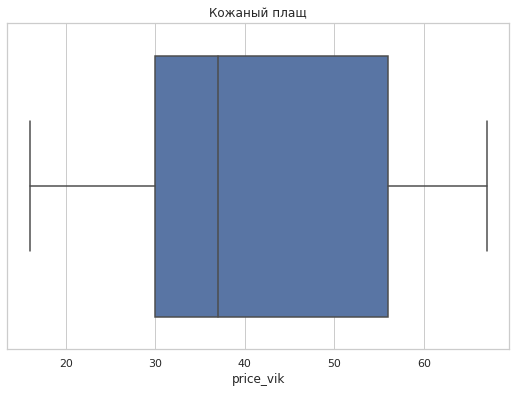

In [375]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(9,6))
ax = sns.boxplot(x=df2["price_vik"]).set_title('Кожаный плащ')